# **Module 2: Data Wrangling, Exploratory Data Analysis (EDA), and Data Visualization**

## **📌 Lecture 2: Data Wrangling & Exploratory Data Analysis (EDA)**


### Recap of the Previous Lecture:

1. Python Basics: Syntax and Data Types
- Explored the core **data types** in Python: `int`, `float`, `str`, and `bool`.
- Discussed **variables** and their role in storing data.
- Introduced **control structures**, including `if-else` statements and loops (`for` and `while`).

2. Data Structures in Python
- Covered **Lists, Tuples, Dictionaries, and Sets** as fundamental structures for storing collections of data.

3. Functions and Modules
- Examined the importance of **functions** for code reusability and modularity.
- Introduced the concept of **modules** and how they allow us to extend Python’s capabilities.

4. Object-Oriented Programming (OOP)
- Learned about **classes** and how they help encapsulate logic and data.
- Introduced the `FinancialCalculator` class, demonstrating methods for **simple and compound interest calculations**.
- Expanded on OOP concepts with **inheritance**, applying it to economic models (e.g., `Consumer` classes).

5. Coding Best Practices and PEP 8
- Emphasized **code readability** and **consistent formatting** using the PEP 8 style guide.
- Discussed **file and folder organization**, ensuring well-structured project directories.
- Implemented meaningful **variable and function names**.

---

### **Objectives for this Module:**
- Introduction to **data frames** and how to work with structured data.  
- Learn about **pandas DataFrames** and how they compare to Stata's `dataframe` and R's `data.frame`.
- Explore **data wrangling techniques**, such as filtering, aggregating, and reshaping data to work with real-world datasets, applying methods to clean, transform, and analyze data.
- Learn the essentials of **data wrangling techniques** for handling missing values, merging, and reshaping data.  
- Learn how to conduct **Exploratory Data Analysis (EDA)** to understand key patterns in economic datasets.

## **Part 1: Understanding DataFrames in Python**

### **1.1 Introduction to DataFrames** 
#### What is a DataFrame?
- A **DataFrame** is a two-dimensional, size-mutable, and heterogeneous tabular data structure with labeled axes (rows and columns).
  - commonly used in data wrangling and exploratory data analysis.
  - are part of the **pandas library**, a powerful data tool for Python.
  - consists of three main components:
    - *rows and columns* - similar to a spreadsheet or a dataset in Stata, or a `data.frame` in R.
    - *labeled axes* - row labels (index) and column names.
    - *heterogeneous data types* - each column can have a different data type (e.g., integer, float, string), unlike NumPy arrays.

#### Python vs Stata vs R
| Feature       | Python (pandas) | Stata | R (data.frame) |
|--------------|----------------|--------|---------------|
| Structure    | Two-dimensional, labeled table | Two-dimensional table | Two-dimensional table |
| Indexing     | Explicit row/column labels | Implicit row numbers | Implicit row numbers |
| Data Types   | Supports mixed types (int, float, object, categorical) | Primarily numeric and categorical | Supports mixed types |
| Operations   | Vectorized operations (`.apply()`, `.groupby()`) | Built-in commands for regressions, summaries | Functional programming style |
| Extensibility | Integrates with NumPy, SQL, ML libraries | Mostly standalone | Compatible with `dplyr`, `tidyverse` |
| Performance  | Optimized for large datasets, fast operations | Good performance, but limited scalability | Efficient but depends on libraries (`data.table`) |


## **How DataFrames are Used in Econometric Analysis**
In **econometrics**, DataFrames act as the core **data structure** for managing, manipulating, and analyzing datasets. They are widely used for:

1. **Data Cleaning & Preparation**  
   - Handling missing values, outliers, and data inconsistencies.
   - Transforming data into a suitable format for analysis.
   - Merging and reshaping datasets.

2. **Exploratory Data Analysis (EDA)**  
   - Summarizing data (`.describe()`, `.groupby()`)
   - Checking **correlations** (`df.corr()`)
   - Detecting **outliers** using **boxplots & histograms**

3. **Regression Analysis**  
   - Running **OLS regression** using `statsmodels`
   - Handling **heteroskedasticity** and **multicollinearity**
   - Performing **difference-in-differences (DiD)** analysis

4. **Panel Data & Time Series**  
   - **Merging** cross-sectional & time-series data (`merge()`)
   - Running **fixed-effects & random-effects models**
   - Handling **autocorrelation & stationarity tests**

5. **Causal Inference & Policy Analysis**  
   - Implementing **Instrumental Variable (IV) regressions**
   - Propensity Score Matching (PSM) for treatment effects
   - Monte Carlo simulations & bootstrapping

In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### Titanic Dataset Example
- To illustrate the concepts, we will use the **Titanic dataset**
- The dataset contains information about passengers on the Titanic, including their survival
- dimensions: 891 rows x 15 columns
- features:
    - `survived`: binary variable (0 = No, 1 = Yes)
    - `pclass`: passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - `sex`: male or female
    - `age`: age of the passenger (integer)
    - `sibsp`: number of siblings/spouses aboard (integer)
    - `parch`: number of parents/children aboard (integer)
    - `fare`: ticket fare (float)
    - `embarked`: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    - `class`: passenger class (1st, 2nd, 3rd)
    - `who`: man, woman, or child
    - `deck`: deck of the ship
    - `embark_town`: town of embarkation
    - `alive`: survival status (Yes or No)
    - `alone`: whether the passenger was alone (True or False)

### Basic Data Cleaning and Preparation

#### Handling **missing values** 
- **Missing values** are common in real-world datasets and can affect the quality of analysis.
- Common strategies for handling missing values include:
  - **Dropping missing values**: Removing rows or columns with missing data. (`.dropna()`)
  - **Imputing missing values**: Replacing missing values with a specific value (e.g., mean, median, mode). (`.fillna()`)
  - **Forward-fill or backward-fill**: Propagating the last known value forward or backward. (`.ffill()`, `.bfill()`)
  - **Interpolation**: Estimating missing values based on existing data points. (`.interpolate()`)

In [2]:
# Determine the number of missing values in each column
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [3]:
# create another dataframe
df_clean = df.copy()

# drop rows in embarked with missing values
df_clean = df_clean.dropna(subset=['embarked']) 

# drop deck column
df_clean = df_clean.drop(columns=['deck'])

print(df_clean.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64


In [4]:
# interpolate missing values in age column
df_clean['age_intfill'] = df_clean['age'].interpolate()
print(df_clean['age'].mean(), df_clean['age'].median())
print(df_clean['age_intfill'].mean(), df_clean['age_intfill'].median())

29.64209269662921 28.0
29.654015748031494 28.5


#### Creating **dummy variables**
- **Dummy variables** are binary (0 or 1) variables used to represent categorical data.
- They are essential for including categorical variables in regression models.
- In pandas, you can create dummy variables using the `pd.get_dummies()` function.
- warning: 
    - **Dummy variable trap**: Avoid multicollinearity by dropping one of the dummy variables.
    - **Dummy variable reference category**: Choose a reference category for interpretation.
    - make sure to look at the contents of the columns to avoid multicollinearity or to make unnecessary columns that will not be used in the analysis since this increases the complexity of the model.

In [5]:
# create dummies for sex
df_clean = pd.get_dummies(df_clean, columns=['sex'], drop_first=True)
df_clean

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_intfill,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,22.0,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,38.0,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,26.0,False
3,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,35.0,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,35.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,27.0,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,19.0,False
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False,22.5,False
889,1,1,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,26.0,True


#### Renaming columns
- **Column names** should be descriptive and follow a consistent naming convention.
- You can rename columns using the `.rename()` method in pandas.

In [6]:
# rename parch to parent_child
df_clean.rename(columns={'parch': 'parent_child'}, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      889 non-null    int64   
 1   pclass        889 non-null    int64   
 2   age           712 non-null    float64 
 3   sibsp         889 non-null    int64   
 4   parent_child  889 non-null    int64   
 5   fare          889 non-null    float64 
 6   embarked      889 non-null    object  
 7   class         889 non-null    category
 8   who           889 non-null    object  
 9   adult_male    889 non-null    bool    
 10  embark_town   889 non-null    object  
 11  alive         889 non-null    object  
 12  alone         889 non-null    bool    
 13  age_intfill   889 non-null    float64 
 14  sex_male      889 non-null    bool    
dtypes: bool(3), category(1), float64(3), int64(4), object(4)
memory usage: 86.9+ KB


#### Handling duplicates
- **Duplicate rows** can skew analysis results and should be removed.
- To identify and remove duplicates, you can use the `.duplicated()` then `.drop_duplicates()` methods.
- **Duplicated rows** are identified based on all column values being the same. 
- warning: 
    - **Dropping duplicates**: Be cautious when removing duplicates to avoid losing valuable data.
    - **Identifying duplicates**: Check for duplicates based on specific columns or subsets of columns.

In [6]:
# check for duplicates
print(df_clean.duplicated().sum())

38


In [7]:
# Identigy the rows with duplicate values
duplicates = df_clean[df_clean.duplicated(keep=False)].sort_values(by='age')
duplicates

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_intfill,sex_male
644,1,3,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False,0.75,False
469,1,3,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False,0.75,False
844,0,3,17.00,0,0,8.6625,S,Third,man,True,Southampton,no,True,17.00,True
500,0,3,17.00,0,0,8.6625,S,Third,man,True,Southampton,no,True,17.00,True
163,0,3,17.00,0,0,8.6625,S,Third,man,True,Southampton,no,True,17.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0,3,44.00,0,0,8.0500,S,Third,man,True,Southampton,no,True,44.00,True
526,1,2,50.00,0,0,10.5000,S,Second,woman,False,Southampton,yes,True,50.00,False
458,1,2,50.00,0,0,10.5000,S,Second,woman,False,Southampton,yes,True,50.00,False
555,0,1,62.00,0,0,26.5500,S,First,man,True,Southampton,no,True,62.00,True


In [8]:
# drop the duplicates
df_clean = df_clean.drop_duplicates()
print(df_clean.duplicated().sum())

0


#### Changing data types
- **Data types** in pandas can be changed to optimize memory usage or facilitate analysis.
- Data types are changed to ensure consistency, accuracy, and efficiency in data operations.
- examples:
    - `pd.to_datetime()`: Convert a column to a datetime format.
    - `astype()`: Convert a column to a specific data type (e.g., int, float, str).
    - `pd.to_numeric()`: Convert a column to numeric data type.

#### String Cleaning and Standardization
- **String cleaning** involves removing leading/trailing spaces, converting to lowercase, and standardizing text.
    - `.str.strip()`: Remove leading and trailing spaces.
    - `.str.lower()`: Convert strings to lowercase.
    - `.str.upper()`: Convert strings to uppercase.
    - `.str.split()`: Split strings based on a delimiter.
- Standardizing strings ensures consistency and accuracy in text-based analysis.
    - `.str.contains()`: Check if a string contains a specific pattern. Returns a boolean mask.
    - `.str.startswith()`: Check if a string starts with a specific pattern.
    - `.str.replace()`: Replace a substring with another value. You can also use this to remove specific characters or patterns.


#### Mapping and Replacing Values
- **Mapping values** involves creating a dictionary to replace specific values in a column.
- **Replacing values** allows you to substitute specific values with new values.
- examples:
    - `map()`: Map values based on a dictionary

In [10]:
# create a dictionary of values to replace in embarked column
embarked_dict = {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}

# map embarked to numeric values
df_clean['emb_dum'] = df_clean['embark_town'].map(embarked_dict)
df_clean

/var/folders/sh/dzgcmtnd42b354w0mn1yt2x00000gn/T/ipykernel_6724/3913590805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['emb_dum'] = df_clean['embark_town'].map(embarked_dict)


,survived,pclass,age,sibsp,parent_child,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_intfill,sex_male,emb_dum
0,0,3,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,22.0,True,0
1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,38.0,False,1
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,26.0,False,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,35.0,False,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,35.0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,39.0,False,2
887,1,1,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,19.0,False,0
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False,22.5,False,0
889,1,1,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,26.0,True,1


#### Selecting and Filtering Data
- this is useful when you want to analyze a subset of the data.
    - if you want to see the features of the passengers who survived
    - in economics, you might want to see the features of the people who are employed or unemployed.
- you can use the `.loc[]` and `.iloc[]` methods to select rows and columns based on labels or indices.
    - `.loc[]`: Select rows and columns based on labels.
    - `.iloc[]`: Select rows and columns based on indices.
- when selecting a subset based on specific conditions:
    - `df[df['column_name'] > value]`: Select rows based on a condition.
    - `df[(df['column_name'] > value) & (df['column_name'] < value)]`: Select rows based on multiple conditions.
- disadvantage of stata: it is difficult to select and filter data in stata compared to python and R.

In [9]:
# Only select all the survivors
df_clean_survived = df_clean[df_clean['survived'] == 1]

In [10]:
df_clean.describe()

,survived,pclass,age,sibsp,parch,fare,age_intfill
count,851.000000,851.000000,674.000000,851.000000,851.000000,851.000000,851.000000
mean,0.391304,2.303173,29.752849,0.542891,0.398355,32.899808,29.742268
std,0.488329,0.842811,14.693174,1.121545,0.820300,50.578135,14.030247
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,21.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000,29.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,38.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [11]:
df_clean_survived.describe()

,survived,pclass,age,sibsp,parch,fare,age_intfill
count,333.0,333.000000,281.000000,333.000000,333.000000,333.000000,333.00000
mean,1.0,1.951952,28.184769,0.477477,0.474474,48.599626,28.43482
std,0.0,0.866427,14.885941,0.709406,0.778152,67.319217,14.51043
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,0.42000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.350000,19.00000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000,28.00000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000,36.00000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,80.00000


### **Merging & Reshaping Data**
#### Merging DataFrames
- **Merging** combines two or more DataFrames based on common columns or indices.

In [12]:
path = "/Users/moxballo/Documents/GitHub/ds4upse-2425s2/"
apis_path = path + "03_data/PHL-PSA-APIS-2022-PUF/"

hh_rec = pd.read_csv(apis_path + "APIS PUF 2022 Household Record.CSV")
mem_rec = pd.read_csv(apis_path + "APIS PUF 2022 Member Record.CSV")
apis_rtg1 = pd.read_csv(apis_path + "APIS PUF 2022 RTG1 - Social Protection - Social Insurance.CSV")
apis_rtg2 = pd.read_csv(apis_path + "APIS PUF 2022 RTG2 - Social Protection - Social Assistance.CSV")
apis_rtg3 = pd.read_csv(apis_path + "APIS PUF 2022 RTG3 - Social Protection - Labor Market Intervention.CSV")
apis_rtg4 = pd.read_csv(apis_path + "APIS PUF 2022 RTG4 - Government Feeding Program.CSV")
apis_rtg5 = pd.read_csv(apis_path + "APIS PUF 2022 RTG5 - Social Protection - Philhealth, Children, Disaster Preparedness and Recovery.CSV")
apis_rth = pd.read_csv(apis_path + "APIS PUF 2022 RTH - Access to Government Services.CSV")
apis_rti = pd.read_csv(apis_path + "APIS PUF 2022 RTI - Housing.CSV")
apis_rtj = pd.read_csv(apis_path + "APIS PUF 2022 RTJ - Water Sanitation and Hygiene.CSV")
apis_rtk = pd.read_csv(apis_path + "APIS PUF 2022 RTK - Other Relevant Information.CSV", on_bad_lines='skip')

In [13]:
# print the .info of the dataframes
apis = {
    "Household Record": hh_rec,
    "Member Record": mem_rec,
    "RTG1 - Social Insurance": apis_rtg1,
    "RTG2 - Social Assistance": apis_rtg2,
    "RTG3 - Labor Market Intervention": apis_rtg3,
    "RTG4 - Government Feeding Program": apis_rtg4,
    "RTG5 - Philhealth, Children, Disaster Prep and Recovery": apis_rtg5,
    "RTH - Access to Government Services": apis_rth,
    "RTI - Housing": apis_rti,
    "RTJ - Water Sanitation and Hygiene": apis_rtj,
    "RTK - Other Relevant Information": apis_rtk
}

# loop through the dictionary and print the .info of each dataframe
for name, data in apis.items():
    print(f"Dataset: {name}" )
    print("shape:", data.shape)
    print("column data types:", data.dtypes)
    print("--------------------")

Dataset: Household Record
shape: (43517, 17)
column data types: REG               int64
HHID              int64
FSIZE             int64
CHLD_6_11         int64
CHLD_12_15        int64
EDUC_6_11         int64
EDUC_12_15        int64
HHMELEM_6_11     object
HHMHS_12_15      object
H04_SEX           int64
H05_AGE           int64
H06_STATUS        int64
H12_HGC           int64
URB               int64
RPSU              int64
REP               int64
RFACT           float64
dtype: object
--------------------
Dataset: Member Record
shape: (179947, 75)
column data types: REG                      int64
HHID                     int64
C101_LNO                 int64
C03_REL                  int64
C04_SEX                  int64
                        ...   
E53B_YEAR10             object
B08J_FREE_TUITION_A     object
B08J_FREE_TUITION_B     object
B08J_FREE_TUITION_C     object
MEM_RFACT3             float64
Length: 75, dtype: object
--------------------
Dataset: RTG1 - Social Insurance
shape: (21

In [14]:
# print the unique number of "HHID" for each dataframe
for name, data in apis.items():
    print(f"Dataset: {name}" )
    print("unique HHID:", data['HHID'].nunique())
    print("--------------------")

Dataset: Household Record
unique HHID: 43517
--------------------
Dataset: Member Record
unique HHID: 43517
--------------------
Dataset: RTG1 - Social Insurance
unique HHID: 43517
--------------------
Dataset: RTG2 - Social Assistance
unique HHID: 43517
--------------------
Dataset: RTG3 - Labor Market Intervention
unique HHID: 43517
--------------------
Dataset: RTG4 - Government Feeding Program
unique HHID: 43517
--------------------
Dataset: RTG5 - Philhealth, Children, Disaster Prep and Recovery
unique HHID: 43517
--------------------
Dataset: RTH - Access to Government Services
unique HHID: 43517
--------------------
Dataset: RTI - Housing
unique HHID: 43517
--------------------
Dataset: RTJ - Water Sanitation and Hygiene
unique HHID: 43517
--------------------
Dataset: RTK - Other Relevant Information
unique HHID: 43515
--------------------


In [15]:
# reduce each dataframe to the first instance of each unique "HHID"
for name, data in apis.items():
    data.drop_duplicates(subset='HHID', keep='first', inplace=True)
    print(f"Dataset: {name}" )
    print("shape:", data.shape)
    print("--------------------")


Dataset: Household Record
shape: (43517, 17)
--------------------
Dataset: Member Record
shape: (43517, 75)
--------------------
Dataset: RTG1 - Social Insurance
shape: (43517, 7)
--------------------
Dataset: RTG2 - Social Assistance
shape: (43517, 5)
--------------------
Dataset: RTG3 - Labor Market Intervention
shape: (43517, 5)
--------------------
Dataset: RTG4 - Government Feeding Program
shape: (43517, 5)
--------------------
Dataset: RTG5 - Philhealth, Children, Disaster Prep and Recovery
shape: (43517, 38)
--------------------
Dataset: RTH - Access to Government Services
shape: (43517, 7)
--------------------
Dataset: RTI - Housing
shape: (43517, 58)
--------------------
Dataset: RTJ - Water Sanitation and Hygiene
shape: (43517, 40)
--------------------
Dataset: RTK - Other Relevant Information
shape: (43515, 28)
--------------------


In [16]:
# merge all the dataframes into one dataframe using the HHID as the key
apis_4merge = {
    "Member Record": mem_rec,
    "RTG1 - Social Insurance": apis_rtg1,
    "RTG2 - Social Assistance": apis_rtg2,
    "RTG3 - Labor Market Intervention": apis_rtg3,
    "RTG4 - Government Feeding Program": apis_rtg4,
    "RTG5 - Philhealth, Children, Disaster Prep and Recovery": apis_rtg5,
    "RTH - Access to Government Services": apis_rth,
    "RTI - Housing": apis_rti,
    "RTJ - Water Sanitation and Hygiene": apis_rtj,
    "RTK - Other Relevant Information": apis_rtk
}

apis_merged = hh_rec.copy()

for name, data in apis_4merge.items():
    data_copy = data.copy()
    data_copy.drop(columns=['REG'], inplace=True)
    apis_merged = apis_merged.merge(data_copy, on='HHID', how='left')

print(apis_merged.shape)

(43517, 265)


In [17]:
apis_merged['K5'].isnull().sum()

np.int64(2)

In [18]:
apis_merged_clean = apis_merged.dropna(subset=['K5'])
print(apis_merged_clean.shape)

(43515, 265)


#### Types of Merging
- we have demonstrated 'left' merging which is the most common type of merging.
- other types of merging include:
    - **Inner join**: Keep only the rows with matching keys in both DataFrames.
    - **Outer join**: Keep all rows from both DataFrames, filling in missing values with NaN.
    - **Right join**: Keep all rows from the right DataFrame, filling in missing values with NaN.
    - **Left join**: Keep all rows from the left DataFrame, filling in missing values with NaN.

### **Feature Engineering**
- **Feature engineering** involves creating new features from existing data, usually to improve model performance in data science
- Economics applications include creating interaction terms, polynomial features, and lagged variables.
- examples:
    - generating per capita variables
    - Creating interaction terms: Multiply two or more variables to capture combined effects.
    - Polynomial features: Generate polynomial terms (e.g., squared, cubed) to capture non-linear relationships.
    - Lagged variables: Create lagged variables to account for time dependencies.

In [22]:
apis_merged_clean['FSIZE'].value_counts()

FSIZE
4     8967
3     7491
5     7225
2     5818
6     4629
1     3861
7     2576
8     1419
9      709
10     381
11     203
12     122
13      51
14      35
15      17
16       5
19       3
17       2
20       1
Name: count, dtype: int64

In [23]:
apis_merged_clean['hh_income_pc'] = apis_merged_clean['K5'] / apis_merged_clean['FSIZE']
apis_merged_clean['hh_income_pc'].describe()

/var/folders/sh/dzgcmtnd42b354w0mn1yt2x00000gn/T/ipykernel_6724/1507751166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apis_merged_clean['hh_income_pc'] = apis_merged_clean['K5'] / apis_merged_clean['FSIZE']


count     43515.000000
mean       6004.897805
std        9039.285687
min         166.666667
25%        2433.333333
50%        3750.000000
75%        6666.666667
max      500000.000000
Name: hh_income_pc, dtype: float64

## **Introduction to EDA**

### **Summary Statistics**
- **Summary statistics** provide a quick overview of the data distribution.
- Common summary statistics include:
    - **Count**: Number of non-missing values in a dataset.
    - **Mean**: Average value of a variable.
    - **Median**: Middle value of a variable.
    - **Standard deviation**: Measure of data dispersion.
    - **Minimum and maximum**: Smallest and largest values in a dataset.
    - **Quantiles**: Values that divide the data into equal parts (e.g., quartiles, deciles).
- Easiest way to generate summary statistics is by using the `.describe()` method.

In [24]:
# print the summary statistics of 'K5' and 'ave_hh_inc' side by side
print(apis_merged_clean[['K5', 'hh_income_pc']].describe())

                   K5   hh_income_pc
count    43515.000000   43515.000000
mean     21114.357991    6004.897805
std      25372.930633    9039.285687
min        500.000000     166.666667
25%       9000.000000    2433.333333
50%      15000.000000    3750.000000
75%      25000.000000    6666.666667
max    1000000.000000  500000.000000


#### Univariate Analysis
- **Univariate analysis** focuses on analyzing a single variable in isolation.
- Common univariate analysis techniques include:
    - **Histograms**: Visualize the distribution of a variable.
    - **Box plots**: Display the distribution of a variable and identify outliers.
    - **Bar plots**: Show the frequency of categorical variables.

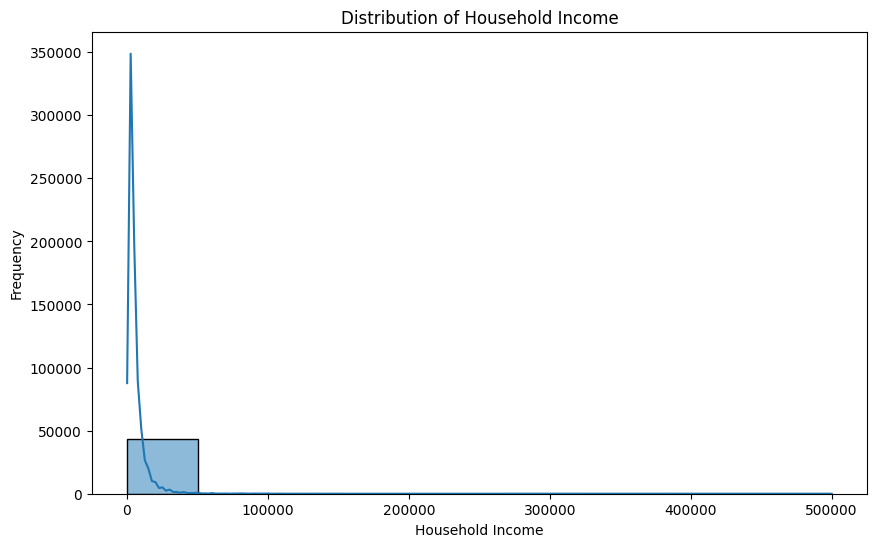

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a distribution of 'hh_income_pc'
plt.figure(figsize=(10, 6))
sns.histplot(apis_merged_clean['hh_income_pc'], bins=10, kde=True)
plt.xlabel("Household Income")
plt.ylabel("Frequency")
plt.title("Distribution of Household Income")
plt.show()

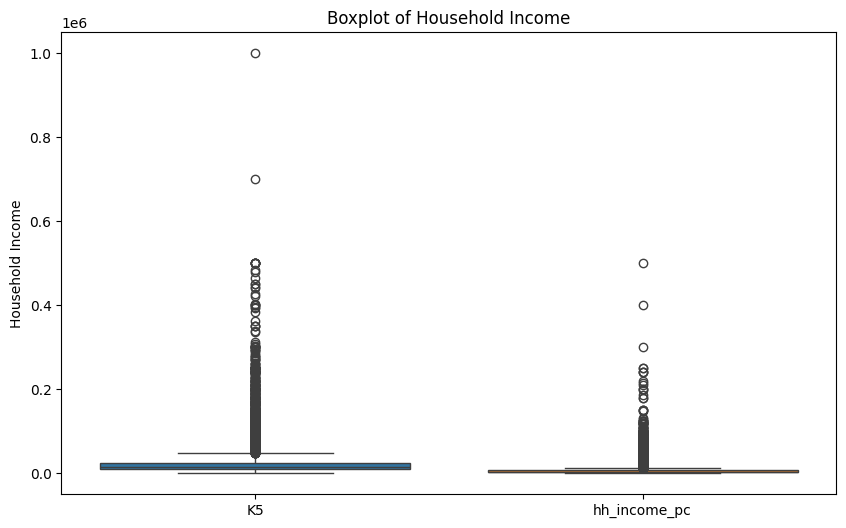

In [26]:
# Create a boxplot of 'hh_income_pc' and 'K5'
plt.figure(figsize=(10, 6))
sns.boxplot(data=apis_merged_clean[['K5', 'hh_income_pc']])
plt.ylabel("Household Income")
plt.title("Boxplot of Household Income")
plt.show()

In [27]:
# Determine the outliers 95
outliers = apis_merged_clean[apis_merged_clean['hh_income_pc'] > apis_merged_clean['hh_income_pc'].quantile(0.99)]
print(outliers.shape)

(436, 266)


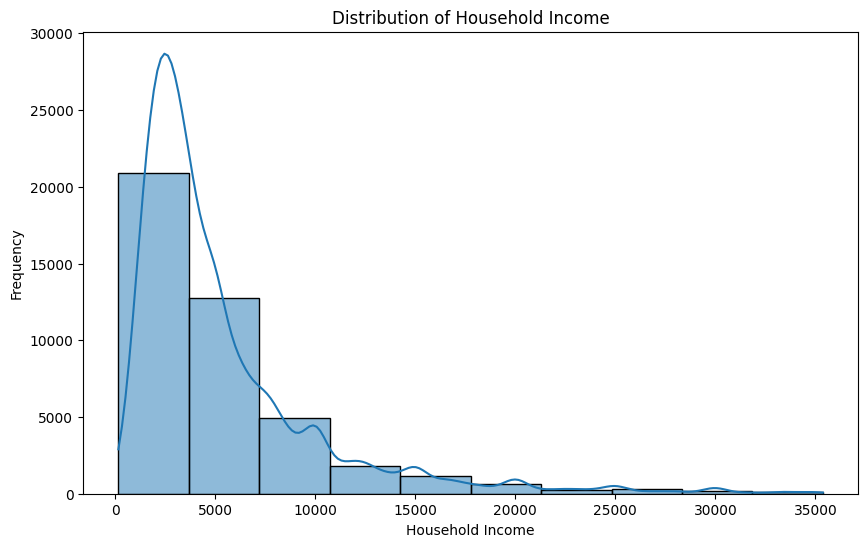

In [28]:
# Plot the distribution of 'hh_income_pc' without the outliers

apis_no_outliers = apis_merged_clean[apis_merged_clean['hh_income_pc'] <= apis_merged_clean['hh_income_pc'].quantile(0.99)]

plt.figure(figsize=(10, 6))
sns.histplot(apis_no_outliers['hh_income_pc'], bins=10, kde=True)
plt.xlabel("Household Income")
plt.ylabel("Frequency")
plt.title("Distribution of Household Income")
plt.show()
